In [1]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt

In [2]:
IMAGE_SHAPE = (224, 224)

In [ ]:
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data_root=("/content/drive/MyDrive/plantpaper/dataset/Apple")

In [ ]:
TRAINING_DATA_DIR = str(data_root)

In [ ]:
datagen_kwargs = dict(rescale=1./255, validation_split=.20)

In [ ]:
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)

valid_generator = valid_datagen.flow_from_directory(TRAINING_DATA_DIR, subset= 'validation', shuffle=True, target_size=IMAGE_SHAPE)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)

train_generator = train_datagen.flow_from_directory(TRAINING_DATA_DIR,subset='training',shuffle=True,target_size=IMAGE_SHAPE)
    

Found 1553 images belonging to 4 classes.
Found 6218 images belonging to 4 classes.


In [ ]:
for image_batch, label_batch in train_generator:
    break
image_batch.shape, label_batch.shape

((32, 224, 224, 3), (32, 4))

In [ ]:
print (train_generator.class_indices)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3}


In [ ]:
labels = '\n'.join(sorted(train_generator.class_indices.keys()))
with open('labels.txt', 'w') as f:
 f.write(labels)
!cat labels.txt

Apple___Apple_scab
Apple___Black_rot
Apple___Cedar_apple_rust
Apple___healthy

In [ ]:
import tensorflow_hub as hub

In [ ]:
model = tf.keras.Sequential([
  hub.KerasLayer('https://tfhub.dev/google/efficientnet/b4/feature-vector/1', 
  output_shape=[1280],
  trainable=False),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')])
model.build([None, 224, 224, 3])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 1792)              17673816  
                                                                 
 dropout_4 (Dropout)         (None, 1792)              0         
                                                                 
 dense_4 (Dense)             (None, 4)                 7172      
                                                                 
Total params: 17,680,988
Trainable params: 7,172
Non-trainable params: 17,673,816
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
 optimizer=optimizer,
 loss='categorical_crossentropy',
 metrics=['acc'])

In [ ]:
import numpy as np

In [ ]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)
hist = model.fit(train_generator, 
   epochs=10,
   verbose=1,
   steps_per_epoch=steps_per_epoch,
   validation_data=valid_generator,
   validation_steps=val_steps_per_epoch).history

Epoch 1/10
195/195 [==============================] - 1744s 9s/step - loss: 0.4363 - acc: 0.8766 - val_loss: 0.1856 - val_acc: 0.9646
Epoch 2/10
195/195 [==============================] - 76s 390ms/step - loss: 0.1562 - acc: 0.9614 - val_loss: 0.1198 - val_acc: 0.9717
Epoch 3/10
195/195 [==============================] - 76s 389ms/step - loss: 0.1145 - acc: 0.9717 - val_loss: 0.0919 - val_acc: 0.9762
Epoch 4/10
195/195 [==============================] - 76s 390ms/step - loss: 0.0890 - acc: 0.9768 - val_loss: 0.0735 - val_acc: 0.9833
Epoch 5/10
195/195 [==============================] - 76s 389ms/step - loss: 0.0732 - acc: 0.9828 - val_loss: 0.0643 - val_acc: 0.9833
Epoch 6/10
195/195 [==============================] - 76s 390ms/step - loss: 0.0630 - acc: 0.9852 - val_loss: 0.0573 - val_acc: 0.9852
Epoch 7/10
195/195 [==============================] - 76s 389ms/step - loss: 0.0598 - acc: 0.9844 - val_loss: 0.0529 - val_acc: 0.9852
Epoch 8/10
195/195 [==============================] - 76

In [ ]:
final_loss, final_accuracy = model.evaluate(valid_generator, steps = val_steps_per_epoch)
print('Final loss: {:.2f}'.format(final_loss))
print('Final accuracy: {:.2f}%'.format(final_accuracy * 100))

49/49 [==============================] - 15s 311ms/step - loss: 0.0439 - acc: 0.9891
Final loss: 0.04
Final accuracy: 98.91%


In [ ]:
history = model.fit_generator(train_generator, 
                    epochs=10, 
                    validation_data=valid_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
195/195 [==============================] - 78s 397ms/step - loss: 0.0424 - acc: 0.9870 - val_loss: 0.0404 - val_acc: 0.9865
Epoch 2/10
195/195 [==============================] - 77s 395ms/step - loss: 0.0405 - acc: 0.9883 - val_loss: 0.0390 - val_acc: 0.9884
Epoch 3/10
195/195 [==============================] - 76s 391ms/step - loss: 0.0366 - acc: 0.9907 - val_loss: 0.0365 - val_acc: 0.9884
Epoch 4/10
195/195 [==============================] - 76s 392ms/step - loss: 0.0346 - acc: 0.9904 - val_loss: 0.0357 - val_acc: 0.9884
Epoch 5/10
195/195 [==============================] - 77s 392ms/step - loss: 0.0338 - acc: 0.9908 - val_loss: 0.0365 - val_acc: 0.9871
Epoch 6/10
195/195 [==============================] - 77s 395ms/step - loss: 0.0338 - acc: 0.9905 - val_loss: 0.0308 - val_acc: 0.9910
Epoch 7/10
195/195 [==============================] - 77s 395ms/step - loss: 0.0314 - acc: 0.9924 - val_loss: 0.0306 - val_acc: 0.9916
Epoch 8/10
195/195 [==============================] - 7

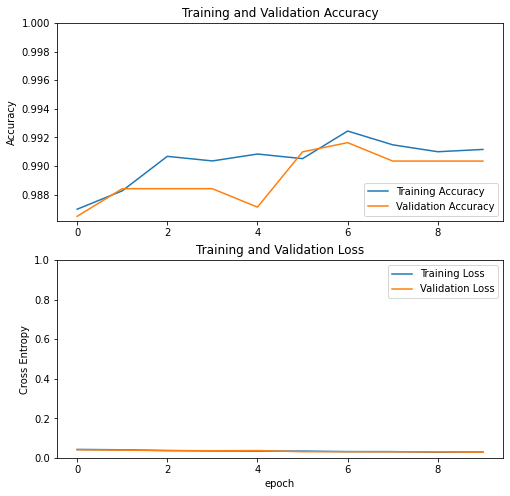

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()